In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
from collections import defaultdict

from SpatialSCvis import transfer_coord_sn

In [3]:
##read in the saved spatial data with H&E image from the output of Tangram
##Customize the file path based on your results_folder in Tangram

sample_id='075B'
adata_vis = sc.read_h5ad("/home/wwang11/cuprizone/tangram_out/"+str(sample_id)+"/ad_sp.h5ad")
adata_vis

AnnData object with n_obs × n_vars = 2312 × 19193
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'cell_count', 'uniform_density', 'rna_count_based_density'
    var: 'gene_ids', 'feature_types', 'genome', 'SYMBOL', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'n_cells', 'sparsity'
    uns: 'overlap_genes', 'sample_colors', 'spatial', 'tangram_cell_segmentation', 'training_genes'
    obsm: 'image_features', 'mt', 'spatial', 'tangram_ct_pred'

(2000, 1923, 3)


/home/wwang11/.conda/envs/tangram_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  if is_string_dtype(df[key]) and not is_categorical(df[key])


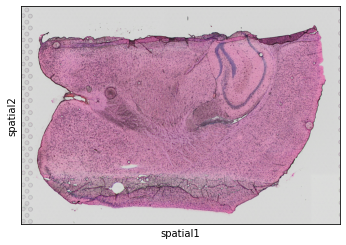

In [4]:
#H&E image
print(adata_vis.uns['spatial'][sample_id]['images']['hires'].shape)
sc.pl.spatial(adata_vis,scale_factor=1)

In [5]:
##Load the single cell or single nucleus reference dataset to assign the coordinates from Tangram
#Customize the file path based on your results_folder in Tangram

adata_sn = sc.read_h5ad("/home/wwang11/cuprizone/tangram_out/"+str(sample_id)+"/ad_sc.h5ad")
adata_sn

AnnData object with n_obs × n_vars = 36653 × 26877
    obs: 'Sample_ID', 'ID', 'Number', 'Study#', 'Group', 'Region', 'Day', 'Ultra', 'intronic_reads', 'exonic_reads', 'intronic_mapped_rate', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'percent_mito', 'n_counts', 'louvain', 'celltype1', 'celltype2', 'celltype6', 'celltype4', 'celltypecl', 'celltypecl_class', 'celltypecl_subclass', 'celltype_up01', 'celltype_up02', 'celltype_up03', 'celltype_up04', 'celltype_up05', 'n_genes', 'cell_id'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'SYMBOL', 'n_cells', 'sparsity'
    uns: 'overlap_genes', 'rank_genes_groups', 'training_genes'
    layers: 'log_norm', 'normalized', 'raw'

In [6]:
adata_sn.obs.head(3)

,Sample_ID,ID,Number,Study#,Group,Region,Day,Ultra,intronic_reads,exonic_reads,...,celltypecl,celltypecl_class,celltypecl_subclass,celltype_up01,celltype_up02,celltype_up03,celltype_up04,celltype_up05,n_genes,cell_id
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGATCCCAT-1-7G-1,7G-1,7G,14,7,Control,GM,3,6,29128,6053,...,Glu_L23ITgm,Glu,L23ITgm,L23ITgm,L23ITgm,L23IT,L23IT,Glu,4926,AAACCCAAGATCCCAT-1-7G-1
AAACCCAAGCAGGGAG-1-7G-1,7G-1,7G,14,7,Control,GM,3,6,2321,1147,...,GL_OLG,GL,OLG,OLG,OLG,OLG,OLG,OLG,1336,AAACCCAAGCAGGGAG-1-7G-1
AAACCCAAGGTTATAG-1-7G-1,7G-1,7G,14,7,Control,GM,3,6,15160,3770,...,GABA_GABAUnid1gm,GABA,GABAUnid1gm,GABAUnid1gm,GABAUnid1gm,GABAUnid1,GABAUnid1,GABA,3584,AAACCCAAGGTTATAG-1-7G-1


In [7]:
adata_sn.uns['spatial']=defaultdict(list)

In [8]:
##Transfer coord from csv to h5ad

adata_sn_map=transfer_coord_sn(name=sample_id,adata_sn=adata_sn, adata_vis=adata_vis,
                  coord_file_path="/home/wwang11/cuprizone/tangram_out/075B/sn_coord.csv",flip=True)

/home/wwang11/.conda/envs/tangram_env/lib/python3.8/site-packages/SpatialSCvis.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_sn.obs['y'][str(mapping_cells[f])] = float(df['y'][str(mapping_cells[f])])
/home/wwang11/.conda/envs/tangram_env/lib/python3.8/site-packages/SpatialSCvis.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_sn.obs['x'][str(mapping_cells[f])] = float(df['x'][str(mapping_cells[f])])
/home/wwang11/.conda/envs/tangram_env/lib/python3.8/site-packages/SpatialSCvis.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

In [9]:
adata_sn_map.obs.head(3)

,Sample_ID,ID,Number,Study#,Group,Region,Day,Ultra,intronic_reads,exonic_reads,...,celltype_up01,celltype_up02,celltype_up03,celltype_up04,celltype_up05,n_genes,cell_id,y,x,capture_id
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGATCCCAT-1-7G-1,7G-1,7G,14,7,Control,GM,3,6,29128,6053,...,L23ITgm,L23ITgm,L23IT,L23IT,Glu,4926,AAACCCAAGATCCCAT-1-7G-1,NaN,NaN,nan
AAACCCAAGCAGGGAG-1-7G-1,7G-1,7G,14,7,Control,GM,3,6,2321,1147,...,OLG,OLG,OLG,OLG,OLG,1336,AAACCCAAGCAGGGAG-1-7G-1,600.761204,692.00555,075B
AAACCCAAGGTTATAG-1-7G-1,7G-1,7G,14,7,Control,GM,3,6,15160,3770,...,GABAUnid1gm,GABAUnid1gm,GABAUnid1,GABAUnid1,GABA,3584,AAACCCAAGGTTATAG-1-7G-1,1055.509345,1217.95096,075B


In [10]:
adata_sn_map.write_h5ad('test_075B.h5ad')

/home/wwang11/.conda/envs/tangram_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'capture_id' as categorical
/home/wwang11/.conda/envs/tangram_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/home/wwang11/.conda/envs/tangram_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  if is_string_dtype(df[key]) and not is_categorical(df[key])
